In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/polonomial/position_salaries.csv.xls


## Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
# ml
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## Read Dataset

In [3]:
df = pd.read_csv('/kaggle/input/polonomial/position_salaries.csv.xls')
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [4]:
px.scatter(df['Level'],df['Salary'])

## Asign X,Y

In [5]:
x = df.iloc[: , 1:2].values
y = df.iloc[:,2].values

In [6]:

X_train , X_test , y_train , y_test = train_test_split(x,y,test_size=.20)

## Show in Linear Regression

In [7]:
## linear regression
rg_model = LinearRegression()
rg_model.fit(X_train,y_train)

LinearRegression()

## Visualize In Linear Regression

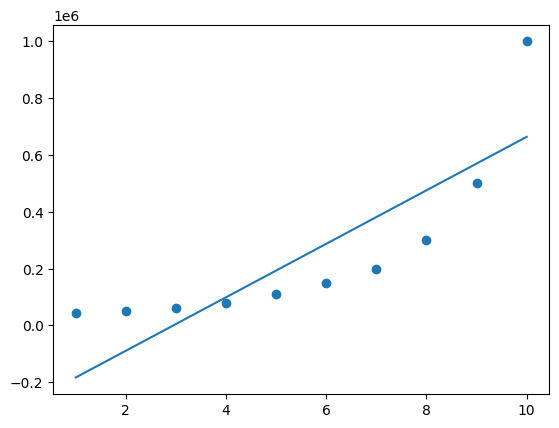

In [8]:
plt.scatter(x,y)
plt.plot(x,rg_model.predict(x))

##  Linear Regression Doesn't correct for data we need Polynomial Regression 

## Import Polynomial

In [9]:
from sklearn.preprocessing import PolynomialFeatures

In [10]:
x_poly = PolynomialFeatures(degree=3)
new_x = x_poly.fit_transform(x)

In [11]:
pol_rg = LinearRegression()
pol_rg.fit(new_x , y)

LinearRegression()

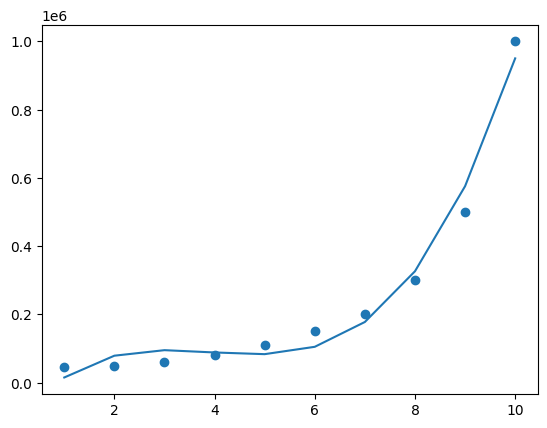

In [12]:
plt.scatter(x,y)
plt.plot(x,pol_rg.predict(x_poly.fit_transform(x)))

## Compare Prediction in Linear and Polynomial Regression

In [13]:
e = pol_rg.predict(x_poly.fit_transform([[5]]))
e

array([83270.3962704])

In [14]:
e = rg_model.predict([[5]])
e

array([193333.33333333])